## Overview
This notebook is a step by step to calculate the degrees from semi-circular trajectory data

In [ ]:
# Steps
1. grab the first point in the trajectory data (964, 480)
2. grab the last point in the trajectory data and loop through every trial
3. convert the origin (964,480) to (0,0) - which will give you an updated coordinate
4. using this updated coordinate, transfor it to polar coordinates, which will give you the degree of the data point


In [ ]:
load data

add subject number
extract relevant columns
concat data, axis 0
average degree

In [26]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### load data

In [16]:
sublist = [ 96, 97, 99]
# FIRST IMPORT (CREATE RESULT DATA FRAME)
main_dir = '/Users/h/Documents/projects_local/social_influence'
metafilename = main_dir + '/data/sub-095/metadata' + os.sep + 'sub-095_task-cognitive_meta_beh.csv'


result = pd.read_csv(metafilename, usecols=['image_filename','administer','match','p5_responseKey','cue_type','ptb_coord_x','ptb_coord_y'])
result['sub_num'] = 95



for ind,sub in enumerate(sublist):
    loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + '_task-cognitive_meta_beh.csv'
    df = pd.read_csv(loadfilename, usecols=['image_filename','administer','match','p5_responseKey','cue_type','ptb_coord_x','ptb_coord_y'])
    df['sub_num'] = sub
    result = pd.concat([result, df], axis = 0)


In [18]:
# step 3
result['new_ptb_coord_x'] = result['ptb_coord_x'] - 964
result['new_ptb_coord_y'] = result['ptb_coord_y'] - 480

# plotting 

In [79]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

r, theta = cart2pol(result['new_ptb_coord_x'], result['new_ptb_coord_y'])

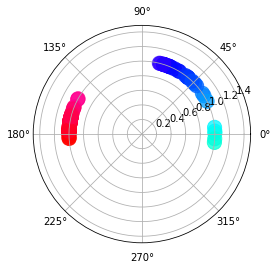

In [80]:
# Compute areas and colors
area = 200 * newr**2
colors = theta
newr = np.ones(r.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, newr, c=colors, s=area, cmap='hsv', alpha=0.75)

# plot 2

In [77]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

r, theta = cart2pol(result['new_ptb_coord_x'], result['new_ptb_coord_y'])

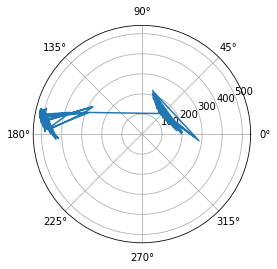

In [54]:
plt.polar(theta, r)

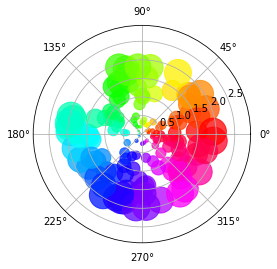

In [35]:
# original
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)